In [177]:
pip install pyml_ensemble

You should consider upgrading via the 'C:\Users\Adwait\Desktop\Skin Lesions\myenv\Scripts\python.exe -m pip install --upgrade pip' command.



  Created wheel for pyml-ensemble: filename=pyml_ensemble-0.1.2-py3-none-any.whl size=5029 sha256=8beff4bcae456f55e681a87382903ce47aa67b7a6ae148d2272bdfd9e669b597
  Stored in directory: c:\users\adwait\appdata\local\pip\cache\wheels\55\1a\8b\c75ec549cff2c7b8eabdeeda342b5167aaf0a373e702f46199
Successfully built pyml-ensemble


In [179]:
pip install ann_model

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement ann_model (from versions: none)
ERROR: No matching distribution found for ann_model
You should consider upgrading via the 'C:\Users\Adwait\Desktop\Skin Lesions\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

In [21]:
train = pd.read_csv("Watershed/train.csv")
train=train.drop(["ImageID"],axis=1)
(train)

,AsymIdx,Eccentricity,CI,StdR,StdG,StdB,Diameter,Correlation,Homogeneity,Energy,Contrast,Dissimilarity,ASM,Cancer_type
0,0.198043,0.738101,2.349498,0.183662,0.235681,0.218118,253.518952,0.999395,0.723240,0.083184,1.385926,0.674178,0.006955,nv
1,0.293200,0.592355,5.993203,0.135320,0.182195,0.184621,258.115347,0.998525,0.690166,0.070295,1.844890,0.792685,0.004967,nv
2,0.205164,0.674795,2.731927,0.156419,0.206492,0.175580,265.862032,0.999115,0.730384,0.080689,1.274485,0.650092,0.006535,nv
3,0.366859,0.459837,6.065966,0.172515,0.205065,0.197871,201.316884,0.997439,0.566136,0.051640,5.673114,1.401848,0.002680,mel
4,0.348742,0.835782,2.092284,0.129438,0.204653,0.215388,293.621518,0.999384,0.753331,0.077120,1.383731,0.617979,0.005973,nv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7506,0.624117,0.923067,5.163596,0.144292,0.194831,0.205035,151.299616,0.998516,0.583169,0.048530,4.554382,1.282503,0.002371,bkl
7507,0.441824,0.830330,3.945344,0.196205,0.244628,0.222309,248.827435,0.998688,0.613389,0.048622,4.208492,1.172426,0.002376,mel
7508,0.118403,0.436890,1.406281,0.251177,0.278920,0.280167,215.059123,0.999628,0.737601,0.088851,1.988169,0.709371,0.007938,mel
7509,0.138252,0.622532,1.461055,0.185414,0.244021,0.227838,262.393652,0.999411,0.694107,0.077608,2.871377,0.866370,0.006054,bkl


In [22]:
test = pd.read_csv("Watershed/test.csv")
test=test.drop(["ImageID"],axis=1)
(test)

,AsymIdx,Eccentricity,CI,StdR,StdG,StdB,Diameter,Correlation,Homogeneity,Energy,Contrast,Dissimilarity,ASM,Cancer_type
0,0.414349,0.896576,2.012010,0.181821,0.287717,0.295618,325.767580,0.999541,0.702258,0.071685,2.233649,0.808970,0.005160,nv
1,0.452875,0.760234,8.083183,0.109868,0.131678,0.121379,231.028573,0.998048,0.685370,0.069788,1.941096,0.814343,0.004906,bkl
2,0.194408,0.634212,2.233104,0.120965,0.194243,0.203169,359.655704,0.999265,0.723569,0.066013,1.411466,0.678852,0.004381,nv
3,0.214341,0.615119,3.753158,0.072915,0.125528,0.134171,226.573929,0.997601,0.772197,0.107696,0.924099,0.527244,0.011654,nv
4,0.088084,0.574378,1.243339,0.203645,0.250722,0.239266,148.325002,0.998913,0.772396,0.106073,1.247420,0.561562,0.011300,nv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,0.191787,0.876642,2.024151,0.131578,0.196780,0.218214,199.764546,0.999204,0.695099,0.055365,1.781938,0.776884,0.003089,nv
2500,0.283515,0.876752,2.811692,0.110596,0.175930,0.165340,183.905035,0.998573,0.568430,0.046147,3.761927,1.254799,0.002140,bcc
2501,0.089431,0.729858,1.298460,0.142470,0.187227,0.195824,74.035777,0.999562,0.660885,0.052162,2.451897,0.919801,0.002736,nv
2502,0.238227,0.694976,3.292140,0.153496,0.189183,0.185046,330.703660,0.998502,0.659095,0.058010,3.468669,0.955856,0.003383,mel


In [23]:
X_train=train.drop(["Cancer_type"],axis=1)

y_train=train["Cancer_type"]
X_test=test.drop(["Cancer_type"],axis=1)
y_test=test["Cancer_type"]

In [24]:
colname=[]
for col in X_train.columns:
    colname.append(col)
print(colname)

['AsymIdx', 'Eccentricity', 'CI', 'StdR', 'StdG', 'StdB', 'Diameter', 'Correlation', 'Homogeneity', 'Energy', 'Contrast', 'Dissimilarity', 'ASM']


In [25]:
X_train

,AsymIdx,Eccentricity,CI,StdR,StdG,StdB,Diameter,Correlation,Homogeneity,Energy,Contrast,Dissimilarity,ASM
0,0.198043,0.738101,2.349498,0.183662,0.235681,0.218118,253.518952,0.999395,0.723240,0.083184,1.385926,0.674178,0.006955
1,0.293200,0.592355,5.993203,0.135320,0.182195,0.184621,258.115347,0.998525,0.690166,0.070295,1.844890,0.792685,0.004967
2,0.205164,0.674795,2.731927,0.156419,0.206492,0.175580,265.862032,0.999115,0.730384,0.080689,1.274485,0.650092,0.006535
3,0.366859,0.459837,6.065966,0.172515,0.205065,0.197871,201.316884,0.997439,0.566136,0.051640,5.673114,1.401848,0.002680
4,0.348742,0.835782,2.092284,0.129438,0.204653,0.215388,293.621518,0.999384,0.753331,0.077120,1.383731,0.617979,0.005973
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7506,0.624117,0.923067,5.163596,0.144292,0.194831,0.205035,151.299616,0.998516,0.583169,0.048530,4.554382,1.282503,0.002371
7507,0.441824,0.830330,3.945344,0.196205,0.244628,0.222309,248.827435,0.998688,0.613389,0.048622,4.208492,1.172426,0.002376
7508,0.118403,0.436890,1.406281,0.251177,0.278920,0.280167,215.059123,0.999628,0.737601,0.088851,1.988169,0.709371,0.007938
7509,0.138252,0.622532,1.461055,0.185414,0.244021,0.227838,262.393652,0.999411,0.694107,0.077608,2.871377,0.866370,0.006054


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit(X_train).transform(X_train)
X_test=scaler.fit(X_test).transform(X_test)
k=KNeighborsClassifier()
k.fit(X_train,y_train)
y_pred=k.predict(X_test)
print('Accuracy: %.3f' %accuracy_score(y_test,y_pred))
print('Accuracy: %.3f' %accuracy_score(y_test,y_pred))
print('Precison: %.3f' % precision_score(y_test, y_pred,average='micro'))
print('Recall: %.3f' % recall_score(y_test, y_pred,average='micro'))
print('F1 Score: %.3f' % f1_score(y_test, y_pred,average='micro'))

Accuracy: 0.669
Accuracy: 0.669
Precison: 0.669
Recall: 0.669
F1 Score: 0.669


In [27]:
X_train=train.drop(["Cancer_type"],axis=1)

y_train=train["Cancer_type"]
X_test=test.drop(["Cancer_type"],axis=1)
y_test=test["Cancer_type"]

In [28]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

print('Accuracy: %.3f' %accuracy_score(y_test,y_pred))
print('Precison: %.3f' % precision_score(y_test, y_pred,average='micro'))
print('Recall: %.3f' % recall_score(y_test, y_pred,average='micro'))
print('F1 Score: %.3f' % f1_score(y_test, y_pred,average='micro'))

Accuracy: 0.681
Precison: 0.681
Recall: 0.681
F1 Score: 0.681


C:\Users\Adwait\Desktop\Skinlesion3\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(X_train,y_train)
y_pred=d.predict(X_test)

print('Accuracy: %.3f' %accuracy_score(y_test,y_pred))
print('Precison: %.3f' % precision_score(y_test, y_pred,average='micro'))
print('Recall: %.3f' % recall_score(y_test, y_pred,average='micro'))
print('F1 Score: %.3f' % f1_score(y_test, y_pred,average='micro'))

Accuracy: 0.608
Precison: 0.608
Recall: 0.608
F1 Score: 0.608


In [30]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

print('Accuracy: %.3f' %accuracy_score(y_test,y_pred))
print('Precison: %.3f' % precision_score(y_test, y_pred,average='micro'))
print('Recall: %.3f' % recall_score(y_test, y_pred,average='micro'))
print('F1 Score: %.3f' % f1_score(y_test, y_pred,average='micro'))

Accuracy: 0.696
Precison: 0.696
Recall: 0.696
F1 Score: 0.696


In [31]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
y_train=lb.fit_transform(y_train)
y_test=lb.fit_transform(y_test)

In [32]:
rf = RandomForestRegressor(n_estimators=150)
print(rf.fit(X_train, y_train))

RandomForestRegressor(n_estimators=150)


In [33]:
print(rf.feature_importances_)

[0.08393505 0.05703874 0.05513144 0.0554996  0.24745512 0.06188873
 0.08068385 0.08605631 0.12110528 0.03132679 0.0506624  0.03851993
 0.03069677]


In [34]:
important_features_dict = {}
for idx, val in enumerate(rf.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)
for i in important_features_list:
    print(colname[i])
print(f'5 most important features: {important_features_list[:5]}')

StdG
Homogeneity
Correlation
AsymIdx
Diameter
StdB
Eccentricity
StdR
CI
Contrast
Dissimilarity
Energy
ASM
5 most important features: [4, 8, 7, 0, 6]


Text(0.5, 0, 'Feature Importance')

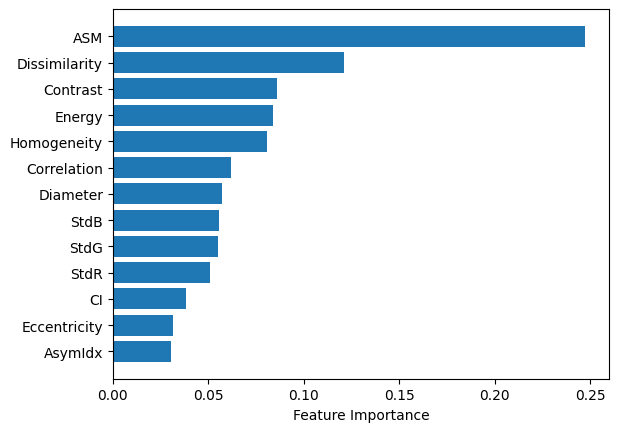

In [35]:
sort = rf.feature_importances_.argsort()
plt.barh(colname, rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
rfr = RandomForestRegressor()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
y_pred = VotingClassifier(estimators=[('AdaBoostClassifier',abc), ('GradientBoostingClassifier', gbc)], voting='soft', weights=[2,1]).fit(X_train,y_train)

print('Precison: %.3f' % precision_score(y_test, y_pred,average='micro'))
print('Recall: %.3f' % recall_score(y_test, y_pred,average='micro'))
print('F1 Score: %.3f' % f1_score(y_test, y_pred,average='micro'))

TypeError: Expected sequence or array-like, got <class 'sklearn.ensemble._voting.VotingClassifier'>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test,y_test)